In [1]:
import math
import pandas as pd
import numpy as np
from numpy import percentile
import datetime as dt
import matplotlib.pyplot as plt
plt.style.use({'figure.facecolor':'white'})
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from statsmodels.tsa.api import ExponentialSmoothing

from distribution_anomaly_detectors import OutlierDetector, MeanAnomalyDetector, DistributionBasedAnomalyDetector, RareDistributionDetector

### Data Import

In [2]:
df = pd.read_csv('../../data/dataset.csv', parse_dates=['datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131184 entries, 0 to 131183
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   ou        131184 non-null  float64       
 1   datetime  131184 non-null  datetime64[ns]
 2   cheques   131184 non-null  int64         
 3   rto       131184 non-null  float64       
 4   n_sku     131184 non-null  int64         
 5   cnt       131184 non-null  int64         
 6   cashnum   131184 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 7.0 MB


In [3]:
df.head()

ou            datetime  cheques      rto  n_sku  cnt  cashnum
0  468.0 2019-11-16 08:00:00       34   8003.0    137  173        3
1  468.0 2019-11-16 09:00:00       40  20129.0    283  517        2
2  468.0 2019-11-16 10:00:00       41  15782.0    185  227        2
3  468.0 2019-11-16 11:00:00       63  39451.0    386  659        4
4  468.0 2019-11-16 12:00:00       84  57330.0    635  992        4

### Visualization timeseries

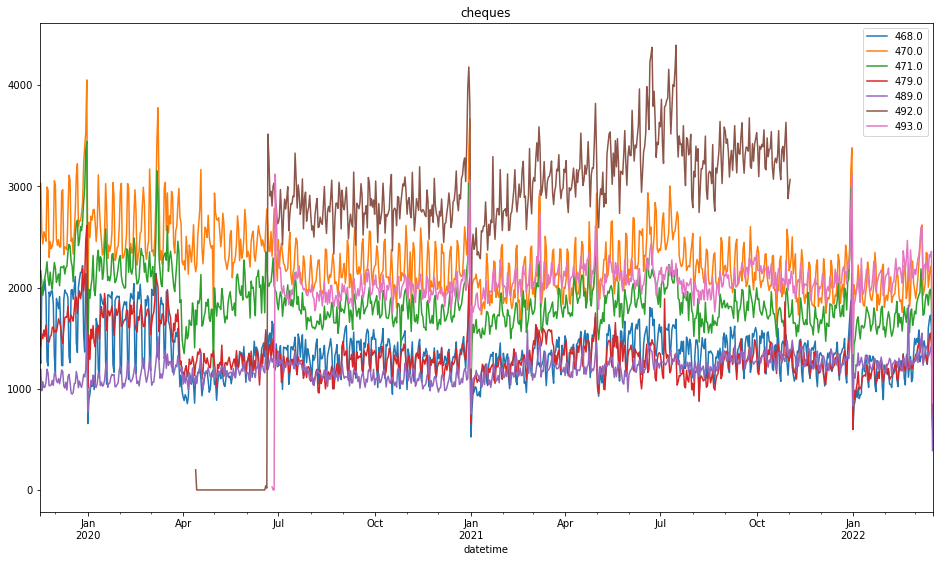

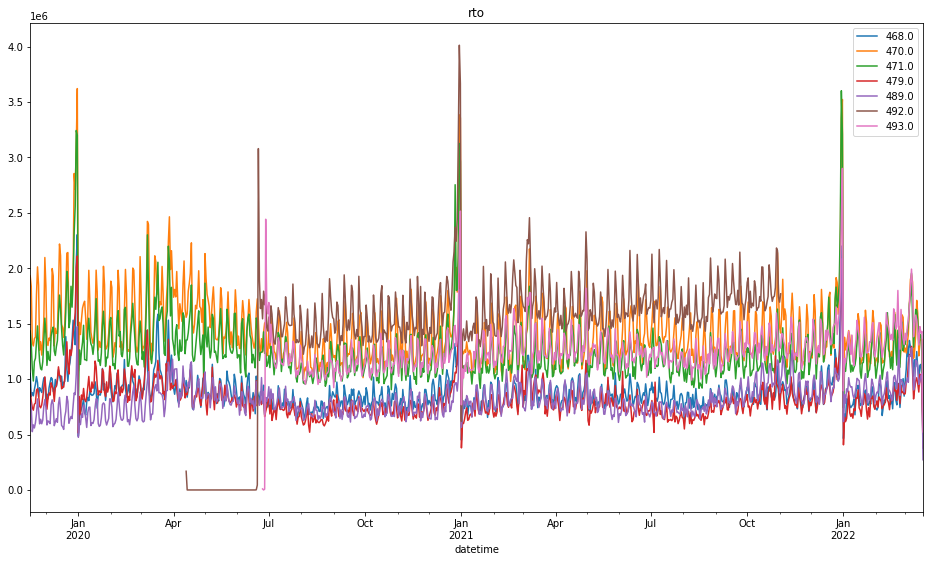

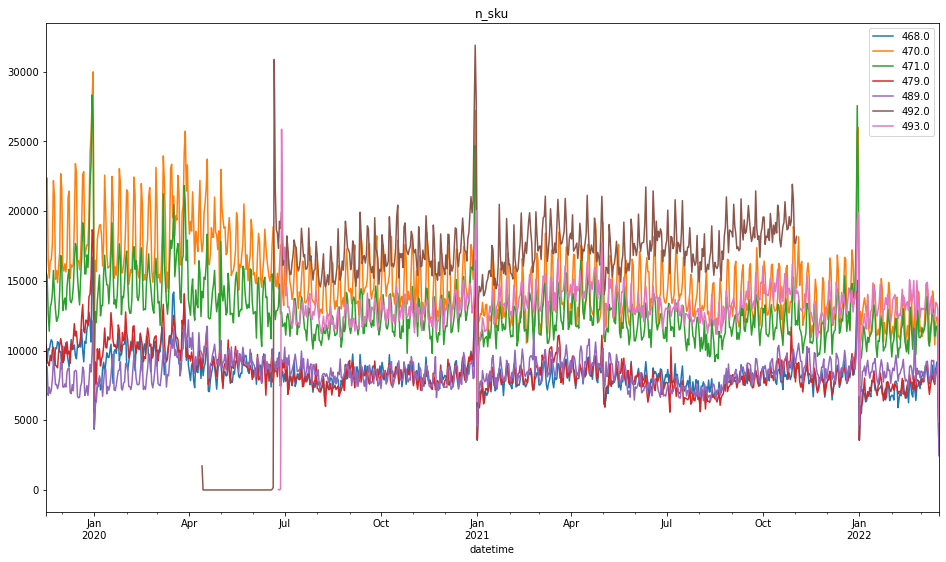

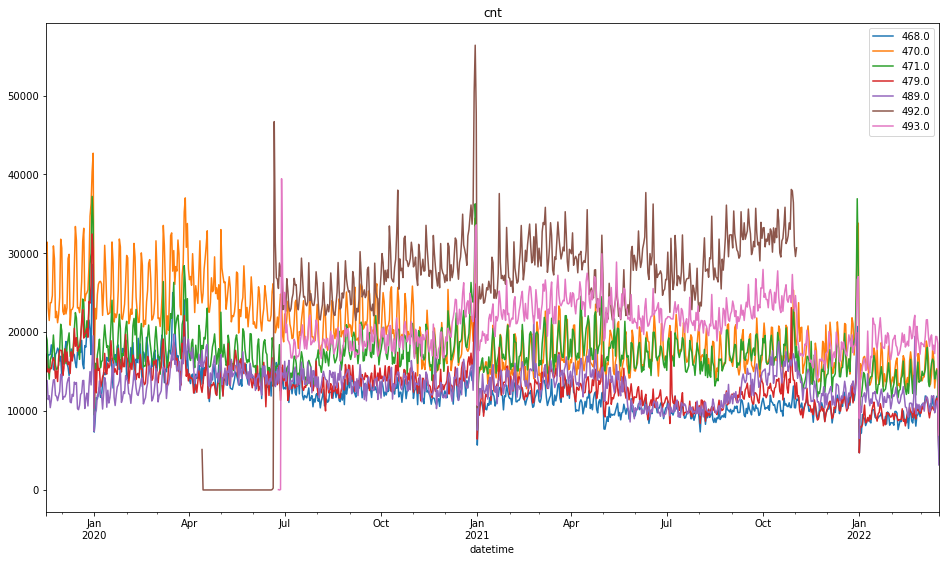

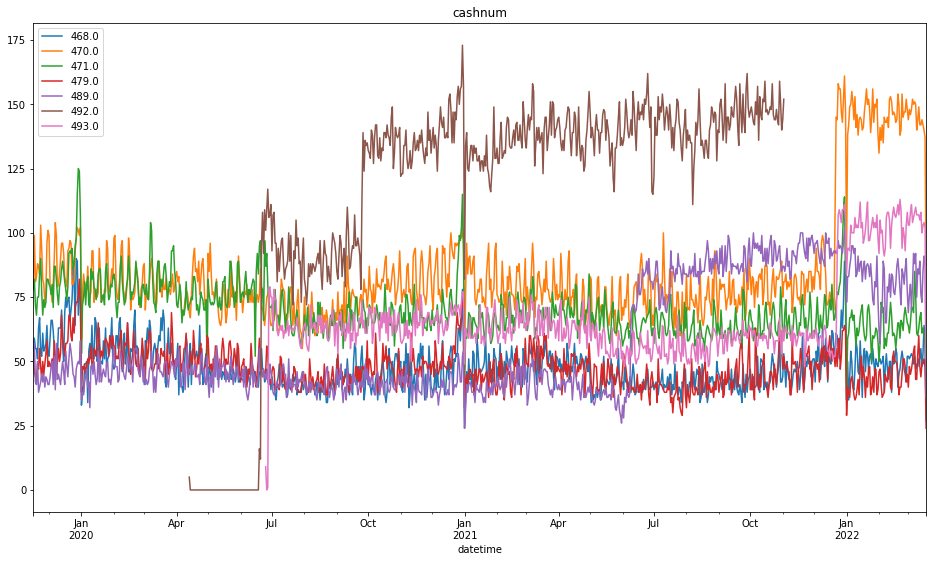

In [4]:
columns = ['cheques', 'rto', 'n_sku', 'cnt', 'cashnum']
for clmn in columns:
    for ou in df['ou'].unique():
        _df = df[df['ou']==ou]
        _df = _df.set_index('datetime').resample('D').sum()
        _df[clmn].plot(figsize=(16,9), label = f'{ou}')
    plt.title(f'{clmn}')
    plt.legend()
    plt.show()

In [5]:
outliers_fraction = 0.2
column = 'cheques'

### Statistical anomalies

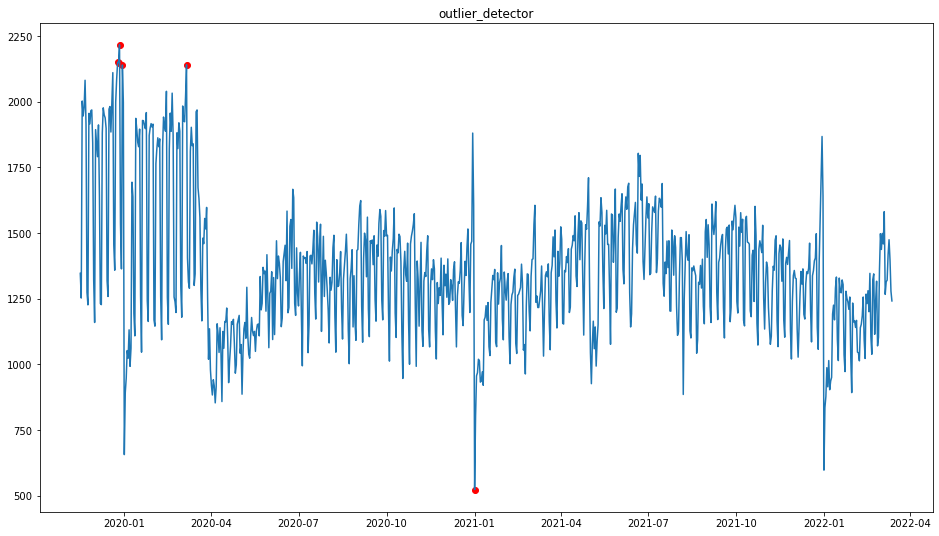

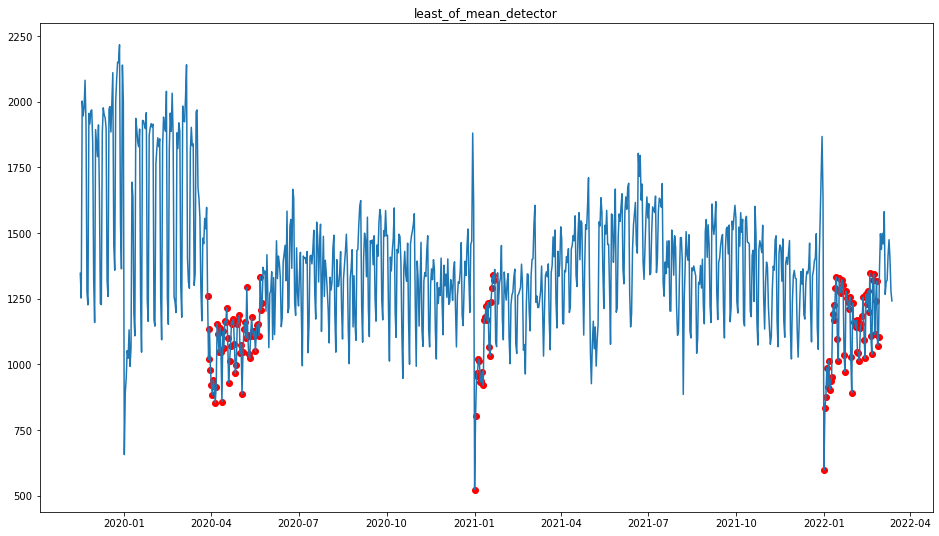

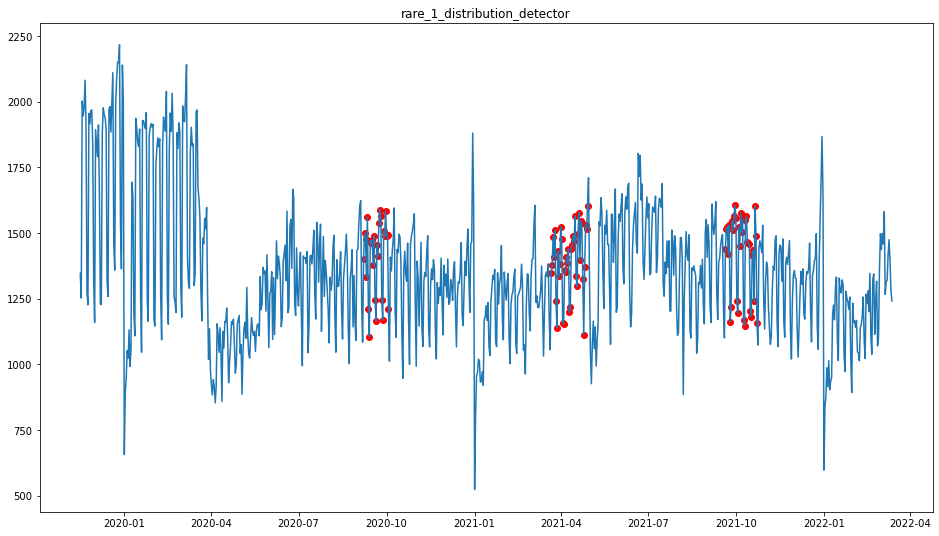

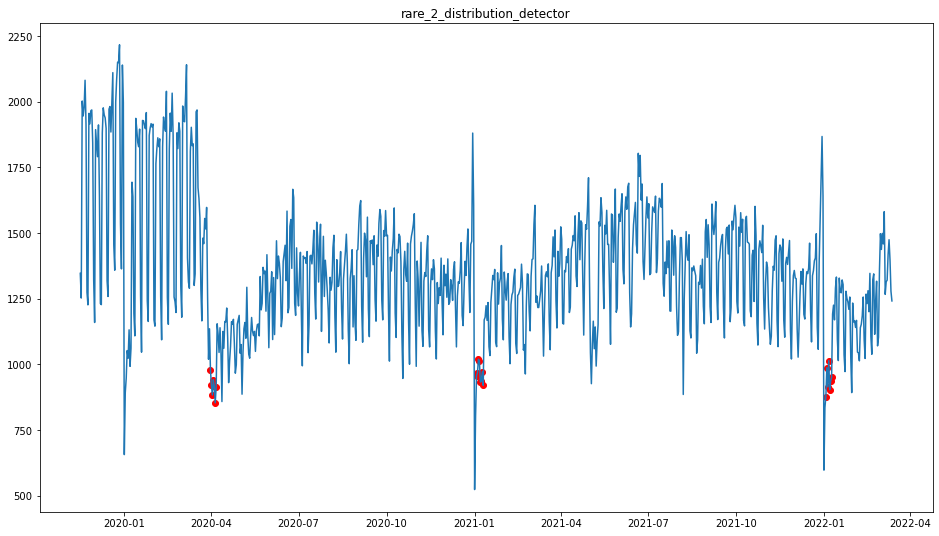

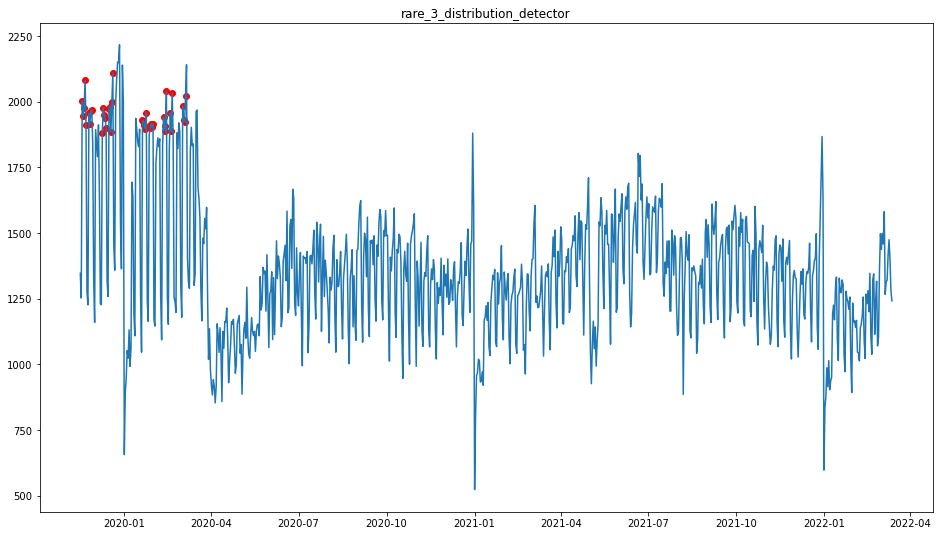

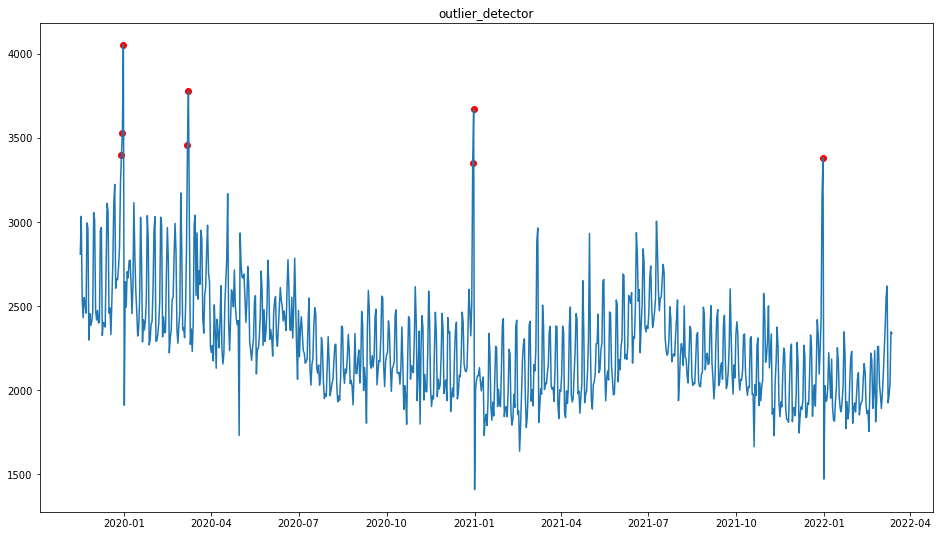

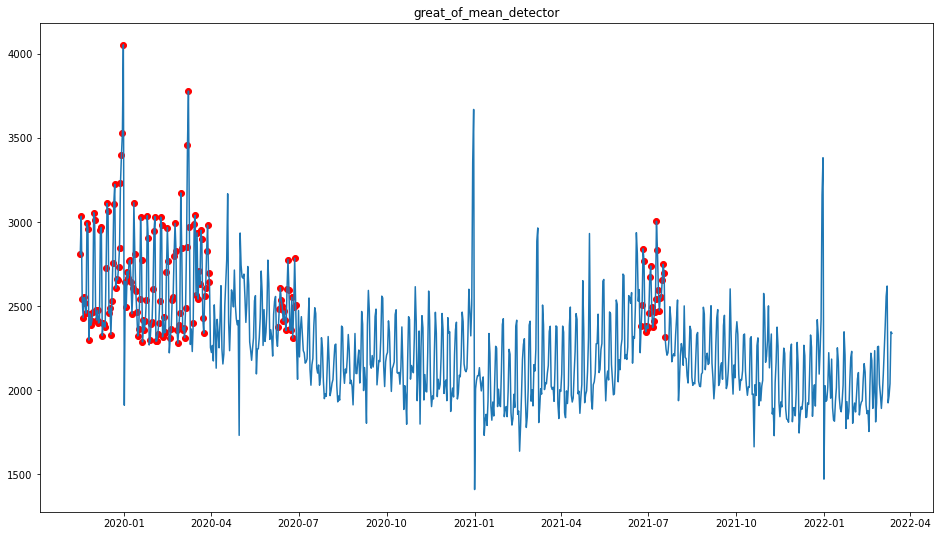

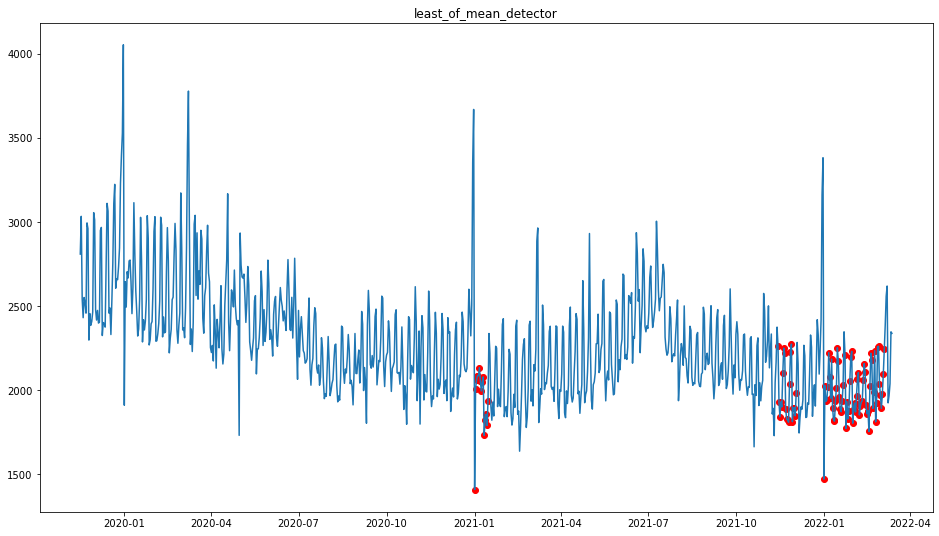

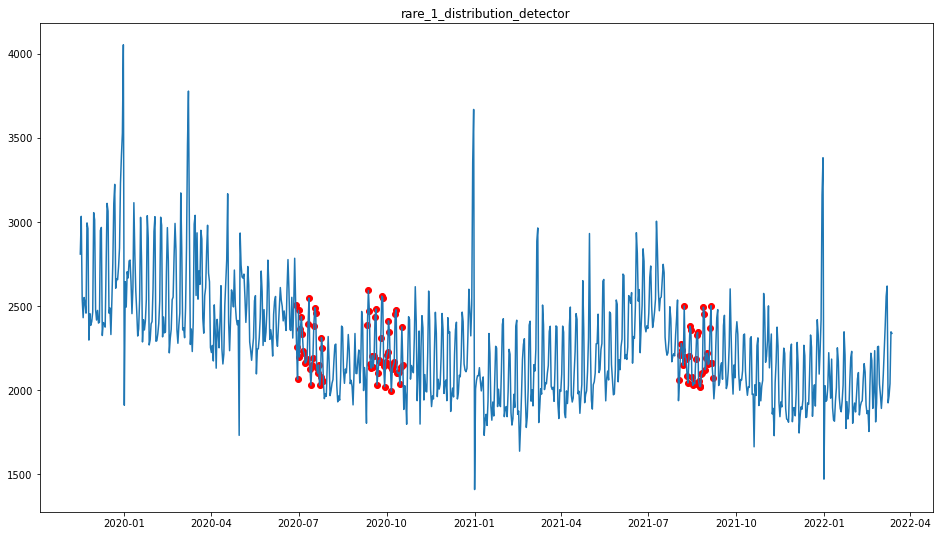

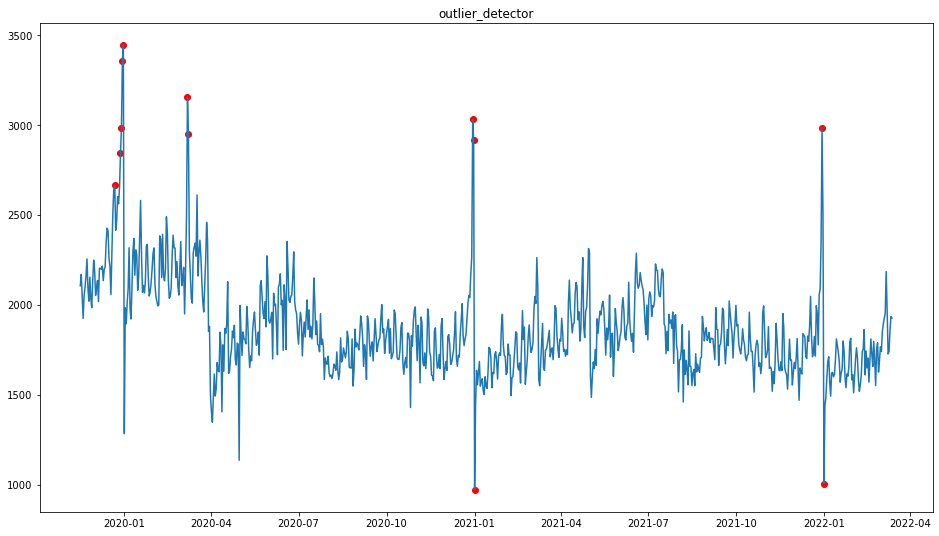

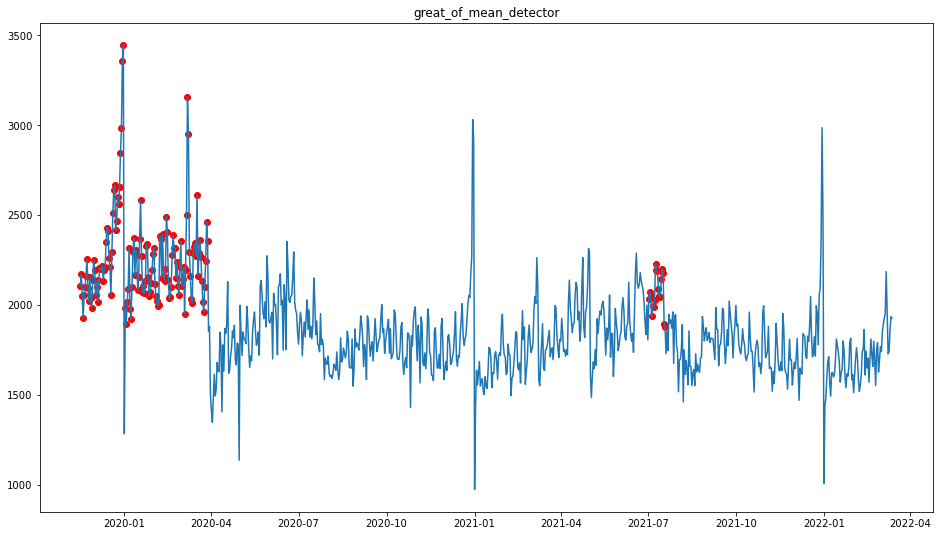

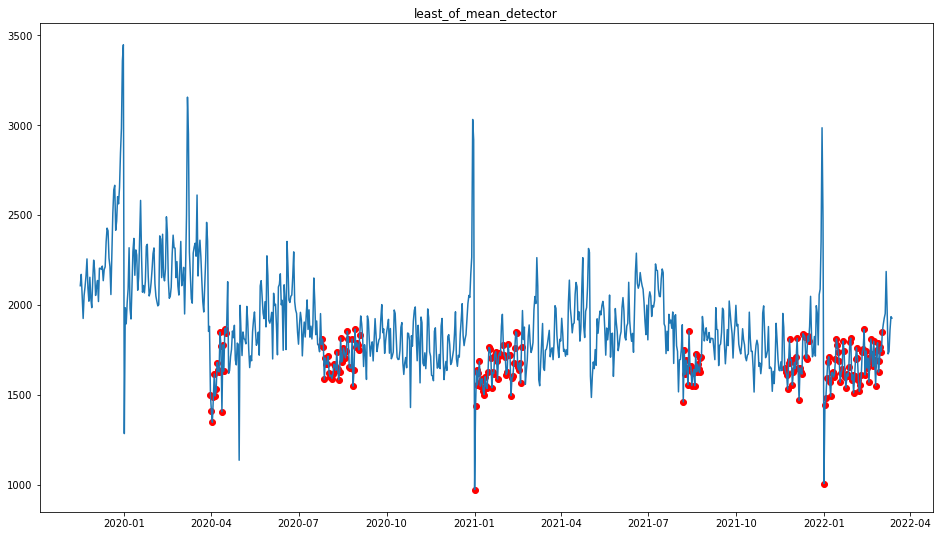

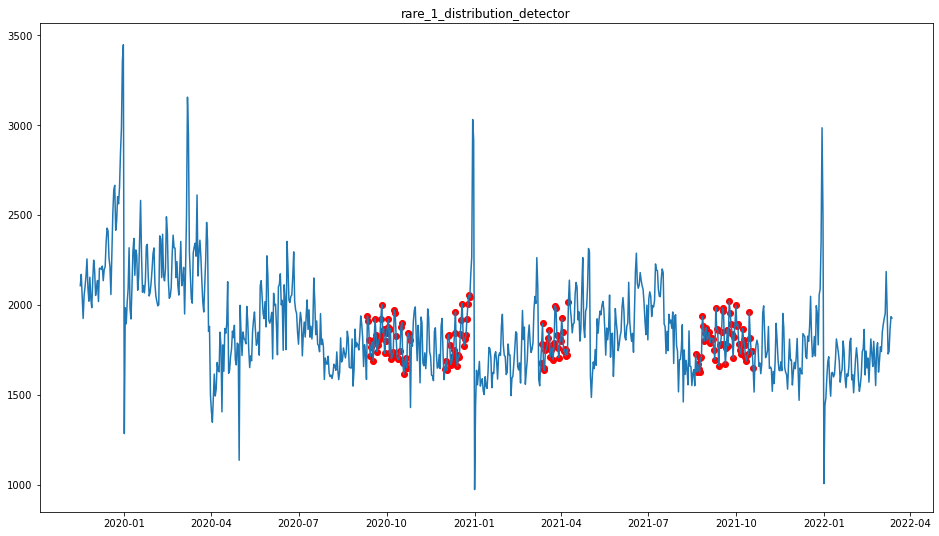

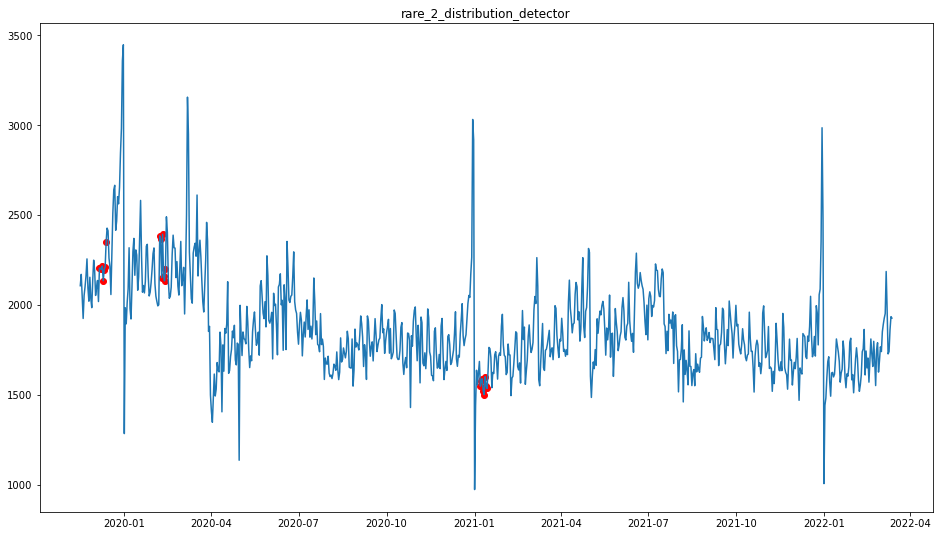

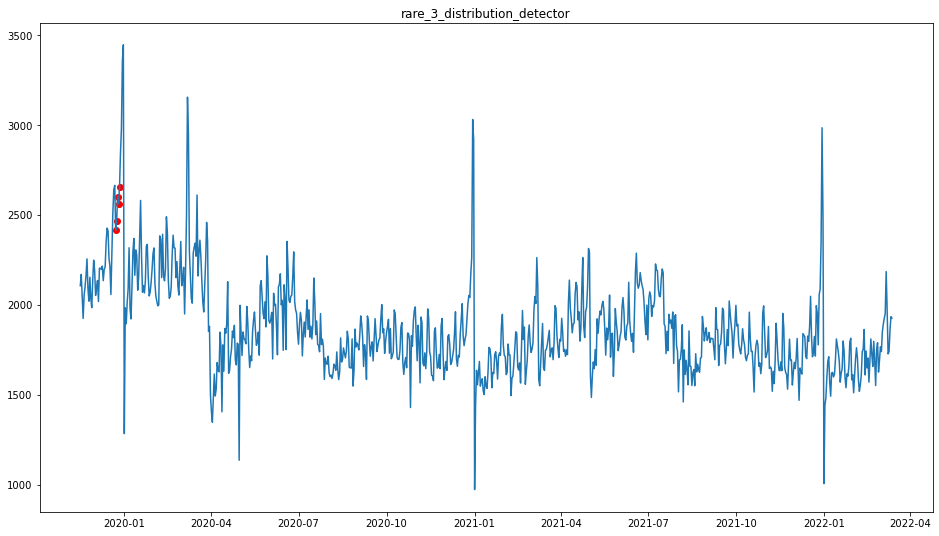

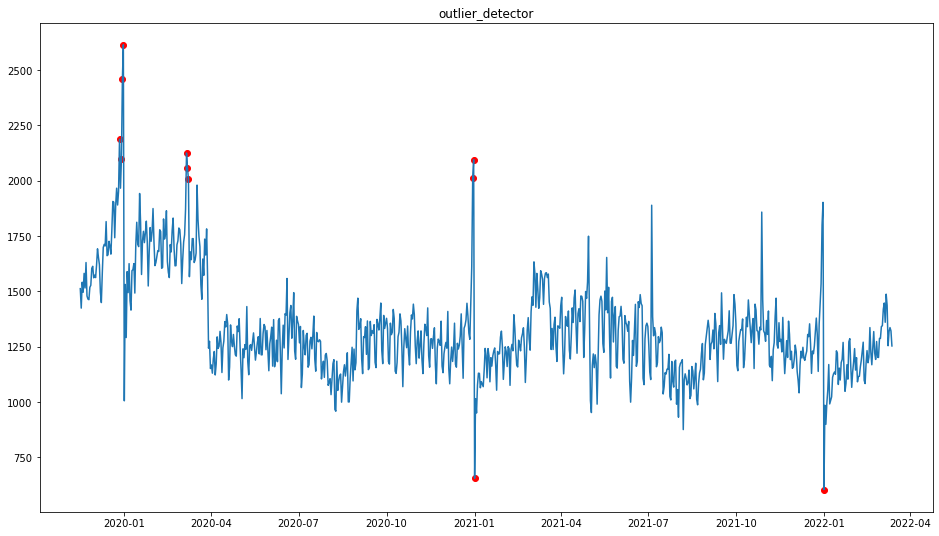

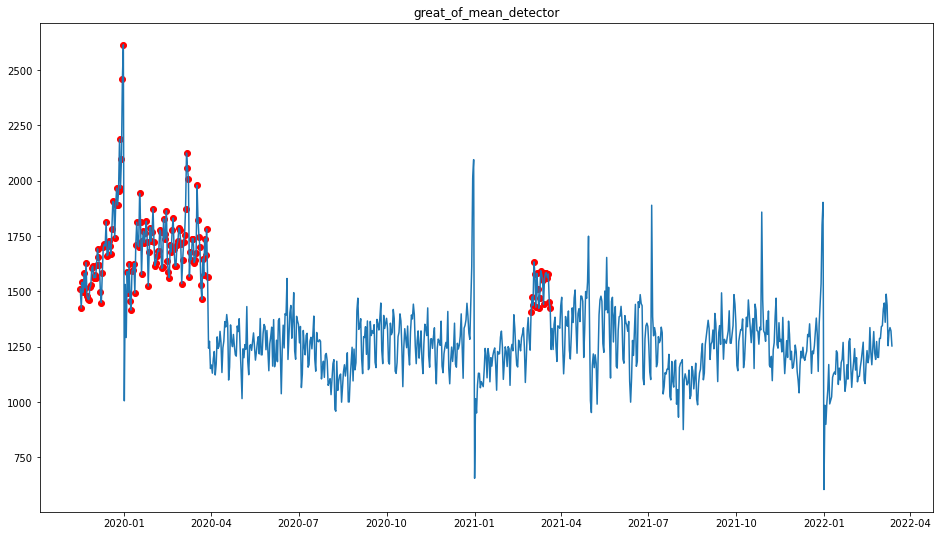

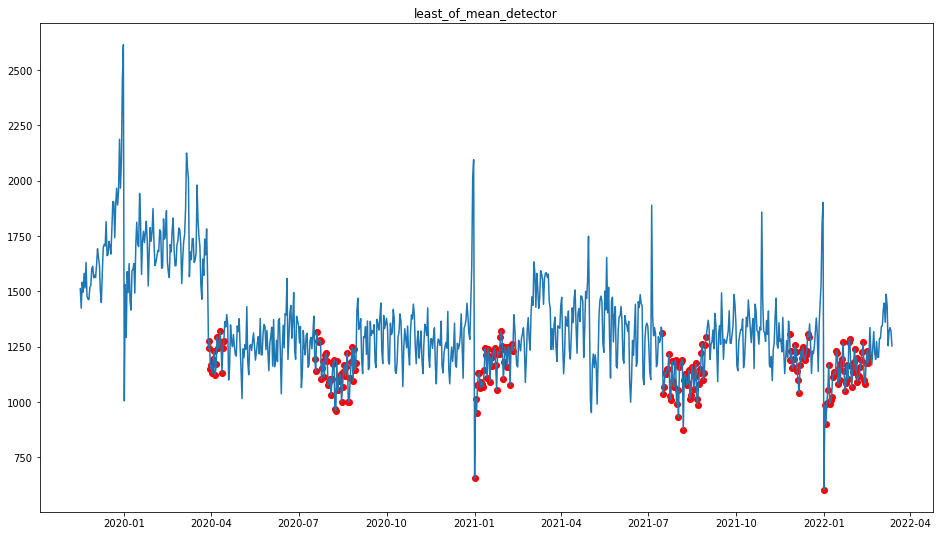

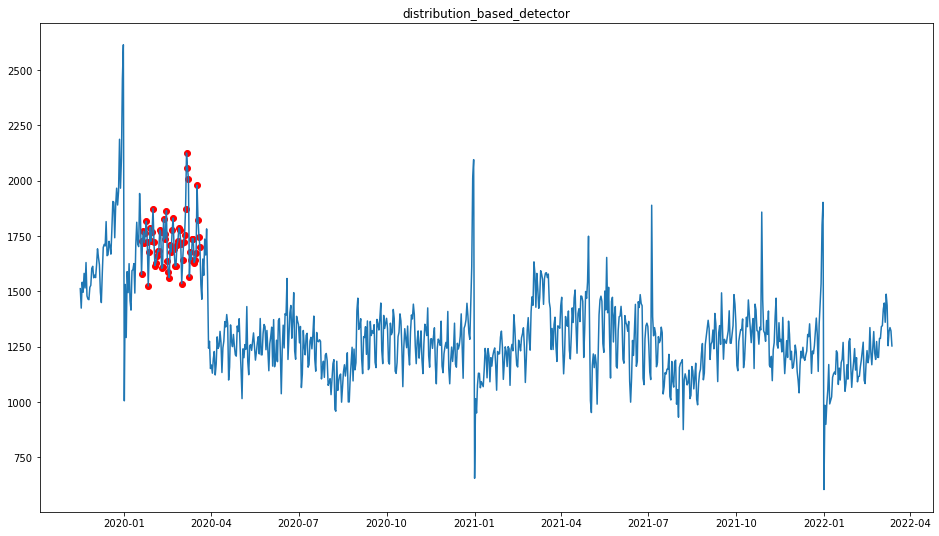

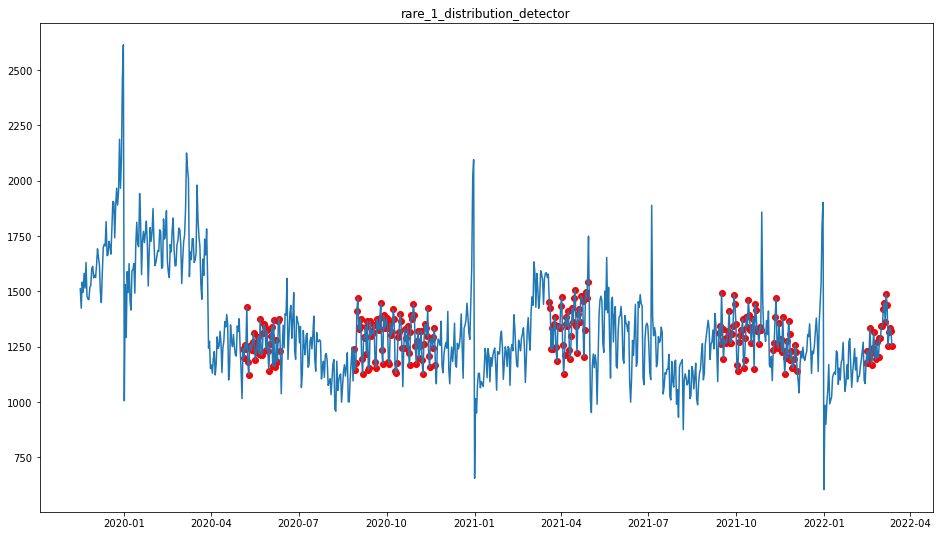

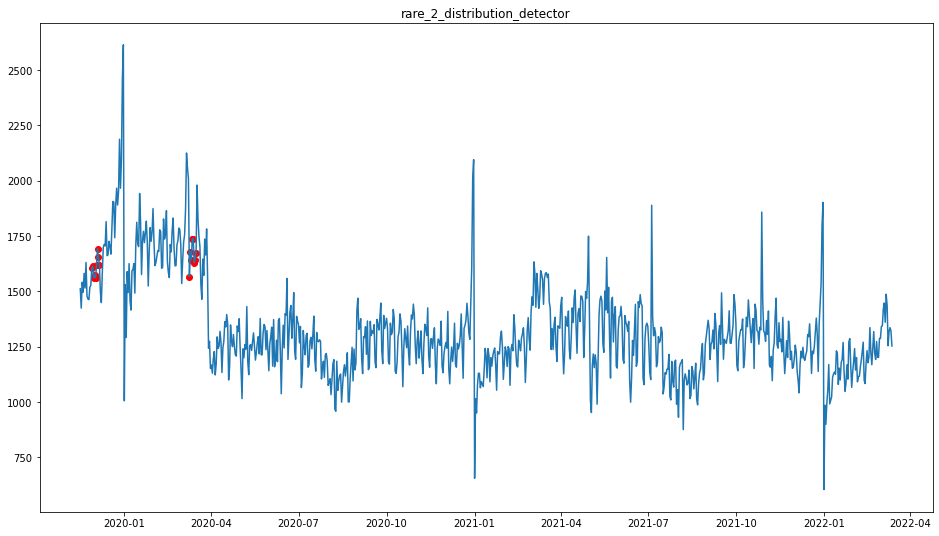

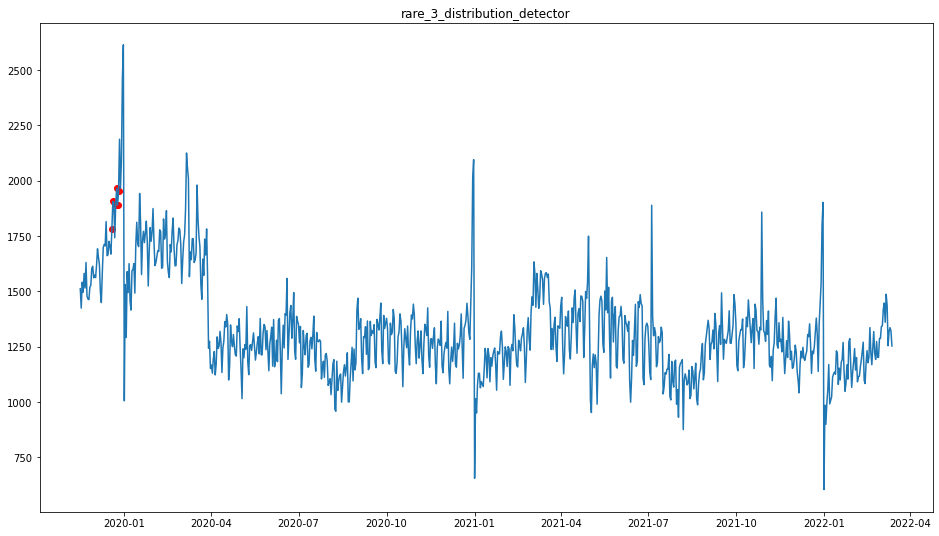

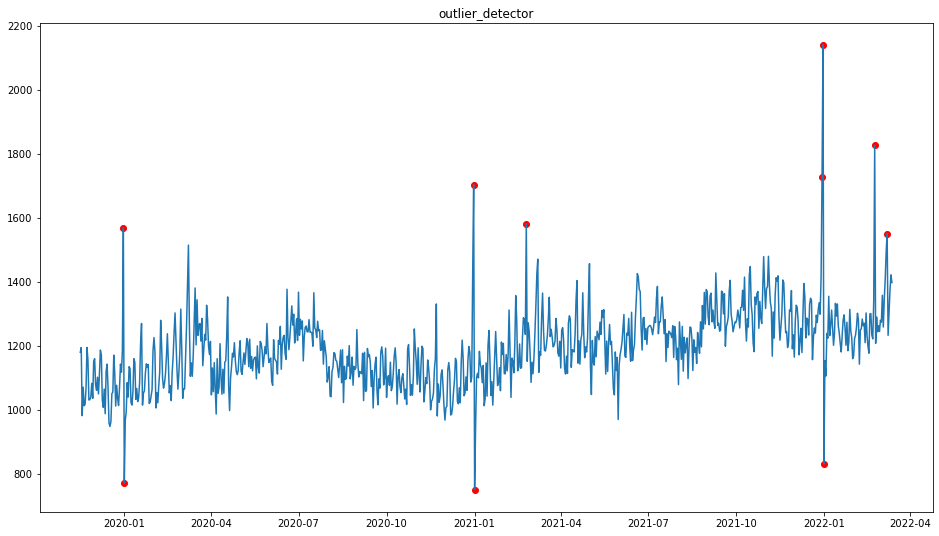

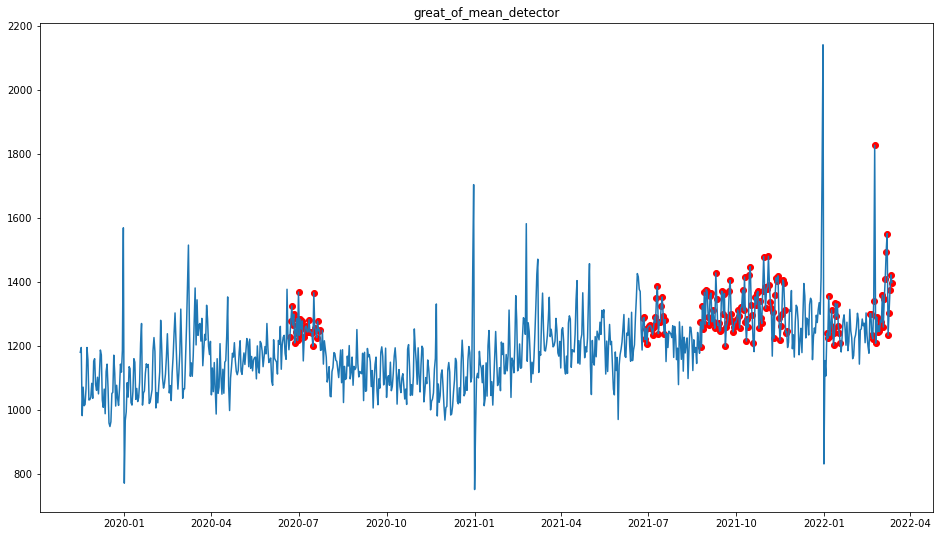

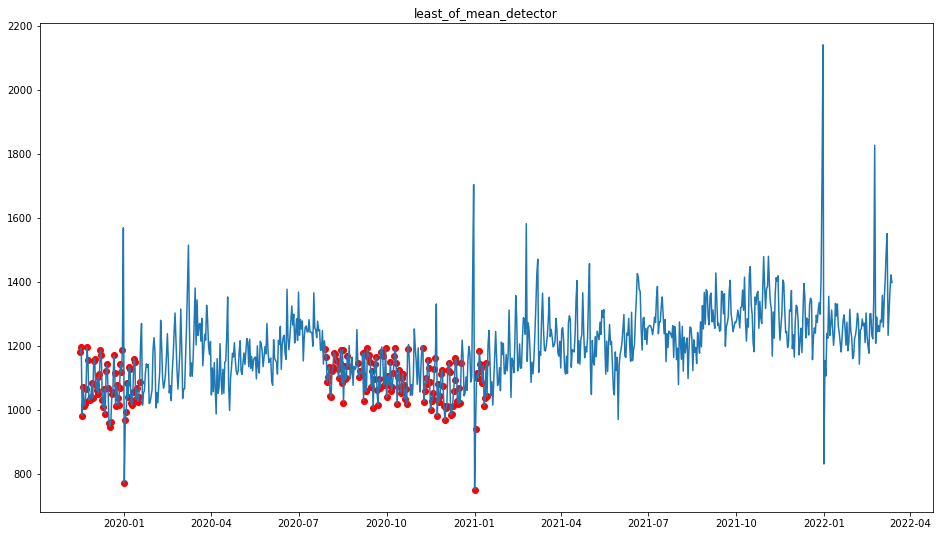

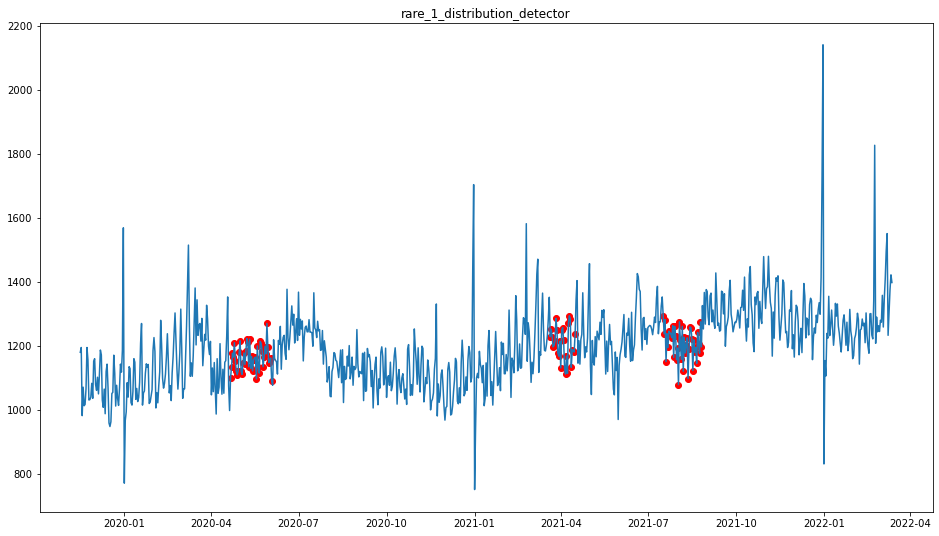

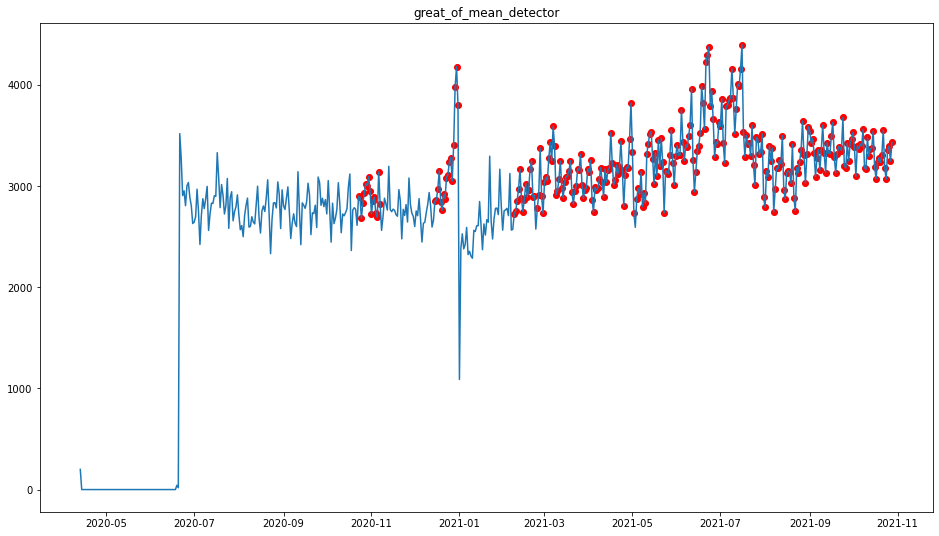

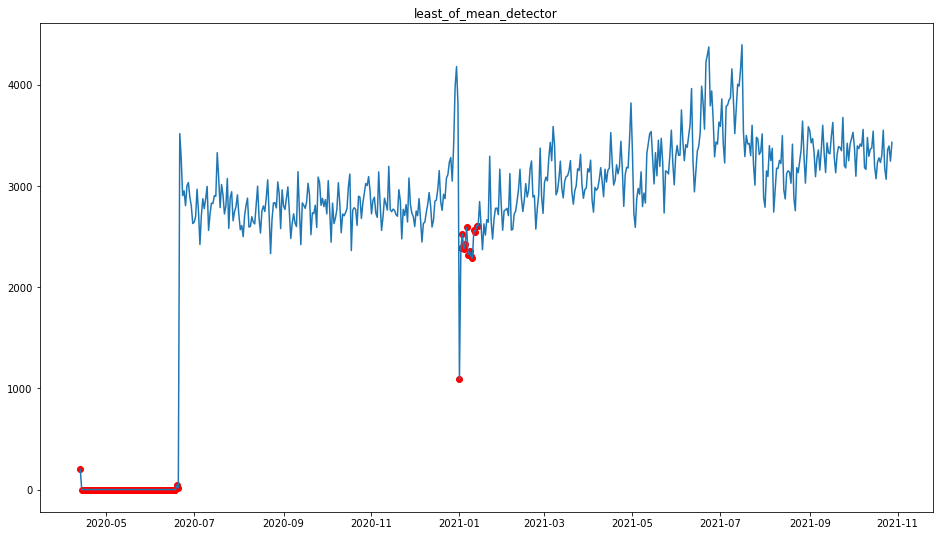

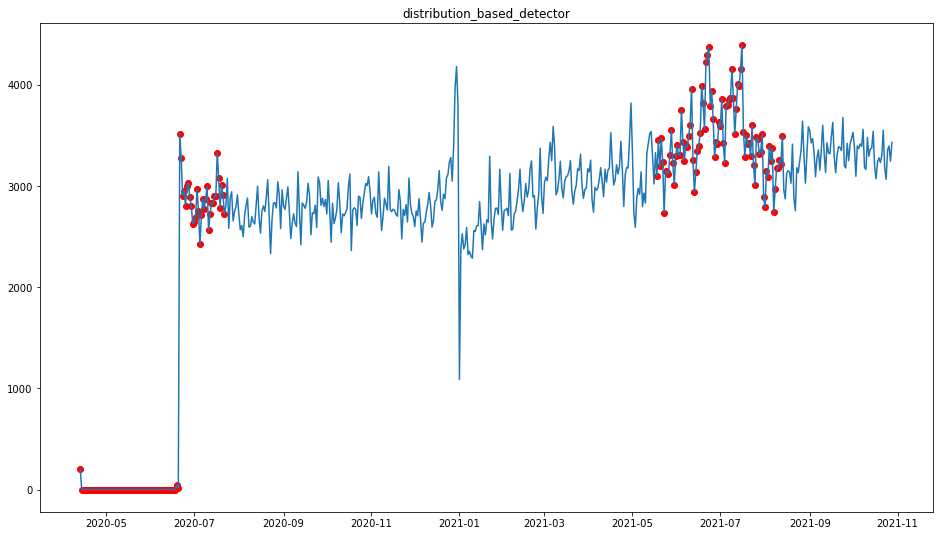

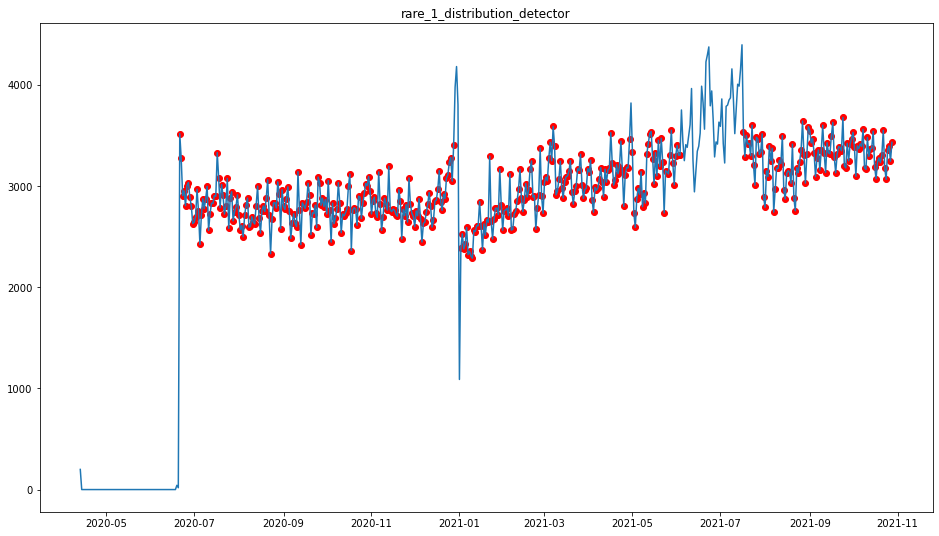

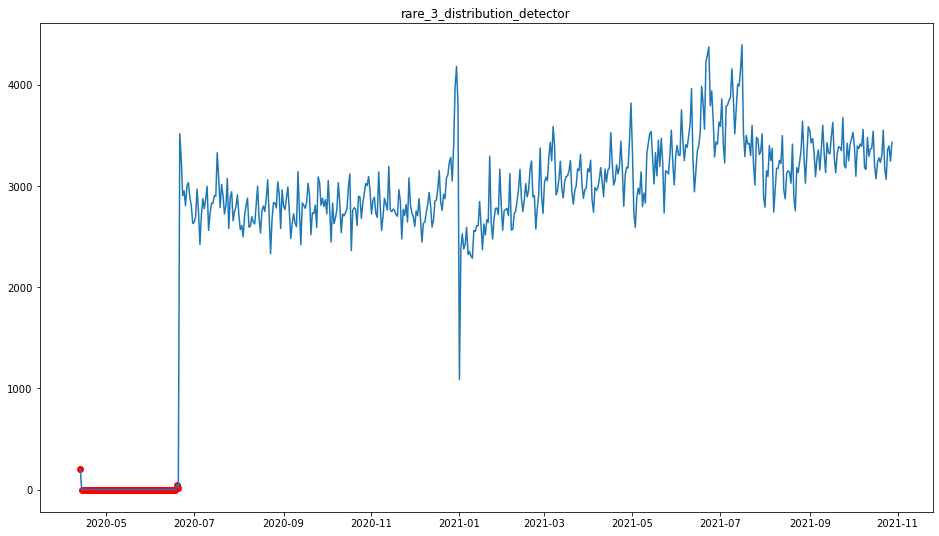

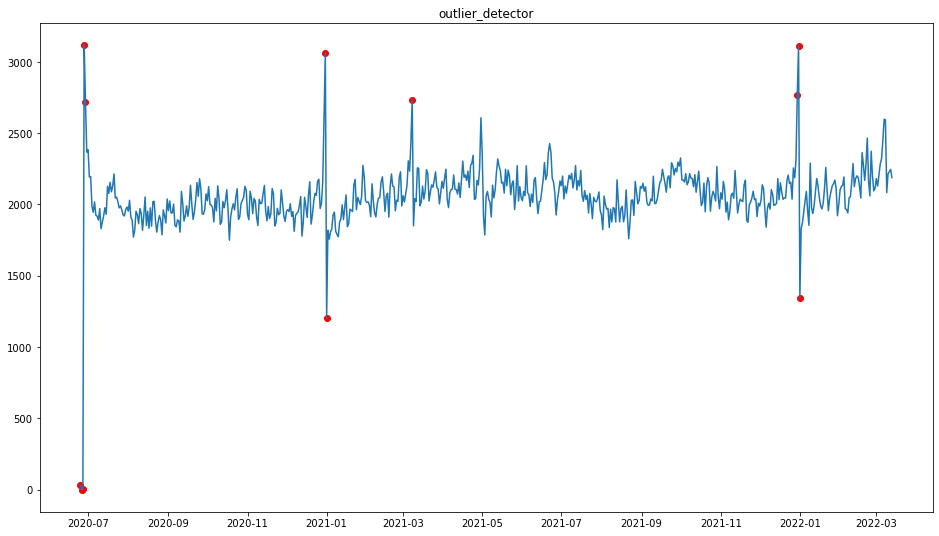

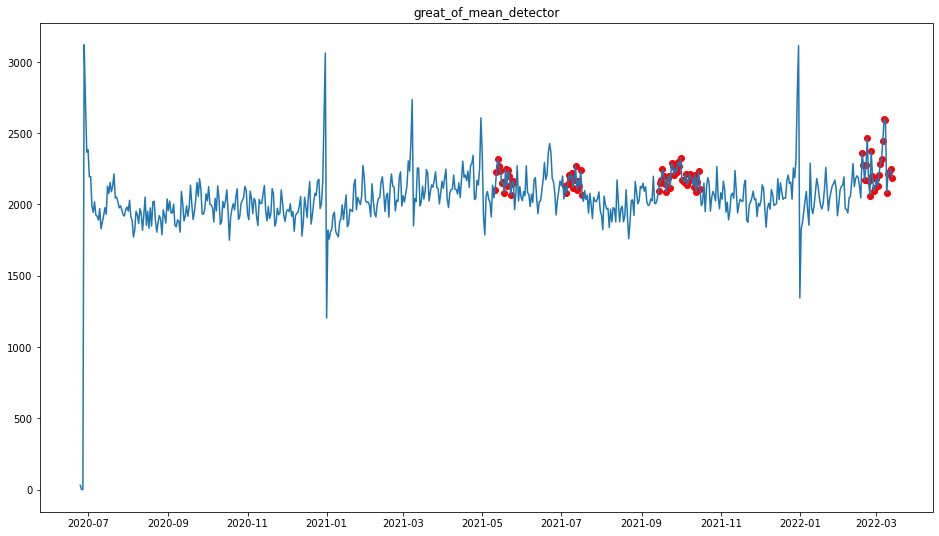

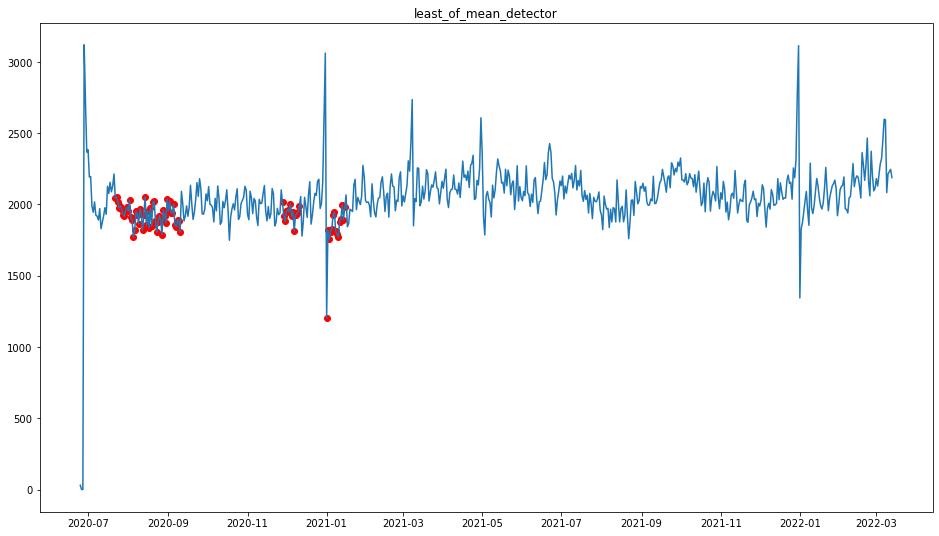

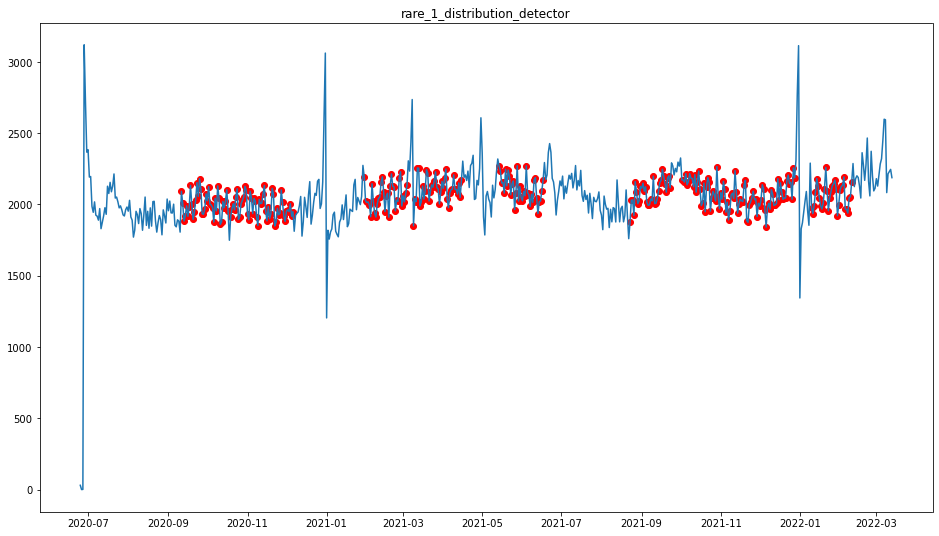

In [6]:
for ou in df.ou.unique():
    dd = df[df.ou==ou]
    dd = dd.set_index('datetime')
    dd = dd[[column]].resample('D').sum()
    dd = dd[:-5]

    detectors = {
        'outlier_detector': OutlierDetector(dd[column]),
        'great_of_mean_detector': MeanAnomalyDetector(dd[column], lower=False, window=14),
        'least_of_mean_detector': MeanAnomalyDetector(dd[column], lower=True, window=14),
        'distribution_based_detector': DistributionBasedAnomalyDetector(dd[column]),
        'rare_1_distribution_detector': RareDistributionDetector(dd[column], n=1, window=25),
        'rare_2_distribution_detector': RareDistributionDetector(dd[column], n=2, window=7),
        'rare_3_distribution_detector': RareDistributionDetector(dd[column], n=3, window=3)
    }

    for detector_name, detector in detectors.items():
        result = detector.get_labels()

        if result.shape[0] > 0 :
            res = pd.DataFrame(result)
            dd[detector_name] = res['label']


            a = dd.loc[~dd[detector_name].isna(), [column]]
            fig, ax = plt.subplots(figsize=(16,9))


            ax.plot(dd[column])
            ax.scatter(a.index, a, c='red')

            plt.title(detector_name)
            plt.show()